In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import sparse
from sklearn.preprocessing import normalize

### Загрузка файлов

In [2]:
employees_df = pd.read_csv("employees.csv", sep = ';')
courses_passing_df = pd.read_csv("courses_passing.csv", sep = ';')
course_employee_sms_df = pd.read_csv("course_employee_sms.csv", sep = ';')
communications_df = pd.read_csv("communications.csv", sep = ';')

### Информация о связи ID и названия курса

In [3]:
import csv

with open('courses_info.csv',encoding='UTF-8') as f:
    reader = csv.reader(f,delimiter=';')
    courses_info = reader
    result = {}
    for row in reader:
        key = row[0]
        result[key] = row[1:]
    #print(result)
    
result

{'3': ['Улучшение качества обслуживания клиентов: Основные принципы'],
 '76': ['Как эффективно использовать психологию в обслуживании клиентов'],
 '22': ['Эффективное обучение клиентов в использовании продукта или услуги'],
 '53': ['Как эффективно реагировать на изменения потребностей клиентов'],
 '7': ['Построение долгосрочных отношений с клиентами: Техники и методы'],
 '87': ['Эффективное проведение клиентских опросов и исследований'],
 '39': ['Развитие навыков активного прослушивания в клиентском сервисе'],
 '86': ['Продвинутые методы анализа и интерпретации клиентских данных'],
 '50': ['Эффективное планирование и организация работы в клиентском сервисе'],
 '79': ['Использование техник активного слушания в общении с клиентами'],
 '54': ['Использование мультимедийных инструментов в клиентском сервисе'],
 '71': ['Как строить доверительные отношения с клиентами'],
 '25': ['Управление нестандартными ситуациями в клиентском обслуживании'],
 '52': ['Методы оценки и улучшения качества обсл

# Эксплораторный анализ

## Сотрудники

In [4]:
employees_df.head()

,employee_id,sex,region,age,head_employee_id,exp_days,edu_degree,department_id,work_online_flg
0,0f840be9-b8db-4d3f-bd5b-a2ce59211f55,M,4,36,c81e728d-9d4c-2f63-6f06-7f89cc14862c,734,0,2,1
1,ac1dd209-cbcc-5e5d-1c6e-28598e8cbbe8,M,4,32,93db85ed-909c-1383-8ff9-5ccfa94cebd9,654,0,2,1
2,a8c88a00-55f6-36e4-a163-a5e3d16adab7,F,5,34,9a115815-4dfa-42ca-ddbd-0694a4e9bdc8,276,1,2,1
3,c91591a8-d461-c286-9b9f-535ded3e213e,F,4,33,9f61408e-3afb-633e-50cd-f1b20de6f466,50,2,0,1
4,bc731692-9fe1-545b-f0b9-8d114ee3ecb8,M,0,33,a97da629-b098-b75c-294d-ffdc3e463904,274,1,2,1


In [5]:
employees_df.isnull().sum()

employee_id         0
sex                 0
region              0
age                 0
head_employee_id    0
exp_days            0
edu_degree          0
department_id       0
work_online_flg     0
dtype: int64

In [6]:
employees_df.describe()

,region,age,exp_days,edu_degree,department_id,work_online_flg
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,2.770265,32.651827,461.728265,1.548509,1.426711,0.568249
std,2.290218,6.752913,374.555018,0.595377,0.703073,0.495424
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,180.000000,1.000000,1.000000,0.000000
50%,3.000000,32.000000,362.000000,2.000000,2.000000,1.000000
75%,4.000000,37.000000,638.000000,2.000000,2.000000,1.000000
max,7.000000,60.000000,2424.000000,2.000000,2.000000,1.000000


In [7]:
# Число сотрудников
num_employees = len(employees_df.index)
num_employees

2381

In [8]:
#Число мужчин и женщин
employees_df.loc[:,['employee_id','sex']].groupby('sex').count()

,employee_id
sex,
F,1129
M,1252


In [9]:
# Образование
employees_df.loc[:,['employee_id','edu_degree']].groupby('edu_degree').count().div(num_employees)

,employee_id
edu_degree,
0,0.053339
1,0.344813
2,0.601848


Text(0.5, 1.0, 'Распределение по возрастам')

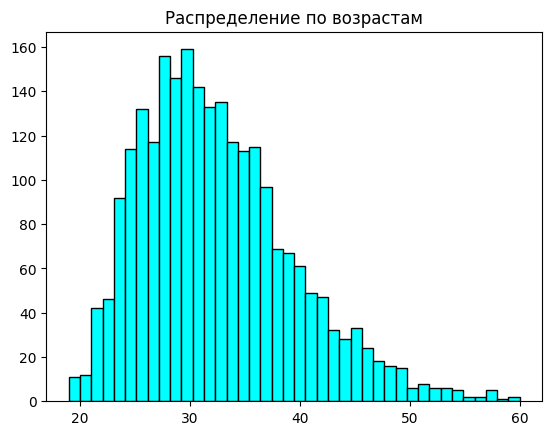

In [10]:
# Возраст
sd=employees_df.groupby(['age'])['employee_id'].count()
bar_chart = plt.figure()
bar_chart = plt.hist(employees_df['age'], color = 'cyan', edgecolor = 'black', bins = 40)
plt.title('Распределение по возрастам')

Text(0.5, 1.0, 'Распределение сотрудников по регионам')

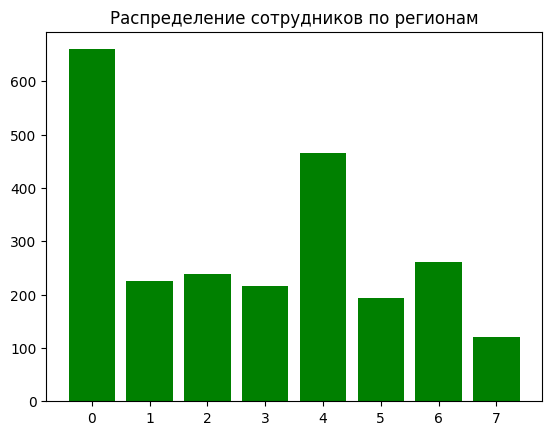

In [11]:
# Регионы
sd=employees_df.groupby(['region'])['employee_id'].count()
bar_chart = plt.figure()
bar_chart = plt.bar(sd.index, sd, color = 'g')
plt.title('Распределение сотрудников по регионам')

Text(0.5, 1.0, 'Распределение сотрудников по департаментам')

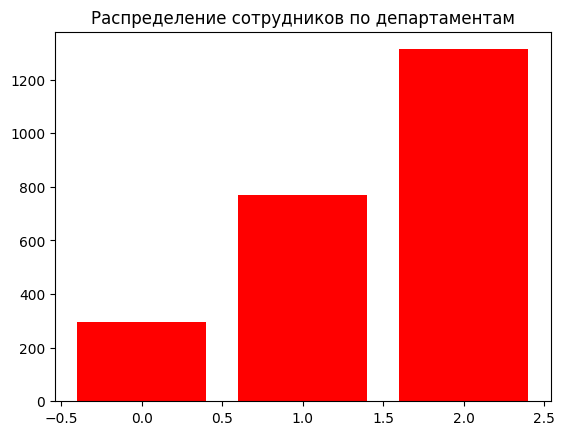

In [12]:
# Департаменты
sd=employees_df.groupby(['department_id'])['employee_id'].count()
bar_chart = plt.figure()
bar_chart = plt.bar(sd.index, sd, color = 'r')
plt.title('Распределение сотрудников по департаментам')

Text(0, 0.5, 'Число сотрудников')

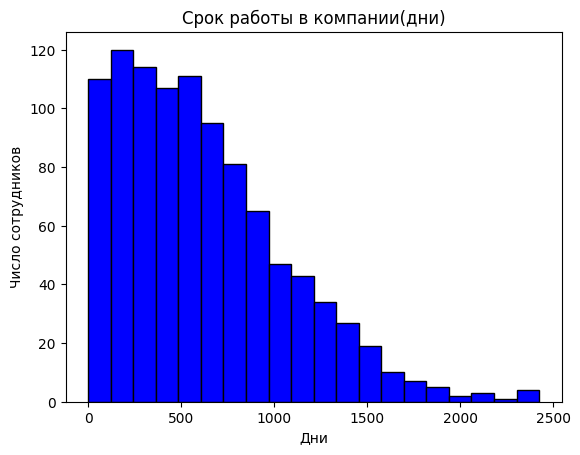

In [13]:
# Срок работы
sd=employees_df.groupby(['exp_days'])['employee_id'].count()
hist_chart = plt.figure()
hist_chart = plt.hist(sd.index, color = 'blue', edgecolor = 'black', bins = int(20))

plt.title('Срок работы в компании(дни)')
plt.xlabel('Дни')
plt.ylabel('Число сотрудников')

### Итого
Самому молодому сотруднику 19 лет, самому старшему - 60

Мужчин и женщин в компании примерно поровну (1252/1129)

Удалённо работают примерно столько же, сколько и очно (0.568249/0.495424)

60% сотрудников имеют высшее образование, 34% - среднее, и около 5% - неоконченное среднее

## Прохождение курсов

In [14]:
course_employee_sms_df.head()

,employee_id,course_0,course_1,course_2,course_3,course_4,course_5,course_6,course_7,course_8,...,course_82,course_83,course_84,course_85,course_86,course_87,course_88,course_89,course_90,course_91
0,2a38a4a9-316c-49e5-a833-517c45d31070,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,4e0928de-0755-38c5-93fb-dabb0c5ef2c3,0,0,0,1,0,0,0,0,1,...,1,1,1,1,0,0,0,0,1,0
2,1ff1de77-4005-f8da-13f4-2943881c655f,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
3,cd3afef9-b8b8-9558-cd56-638c3631868a,0,0,1,1,1,0,0,0,1,...,1,0,1,1,1,0,1,1,1,0
4,dc513ea4-fbda-a7a1-4786-ffdebc4ef64e,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [16]:
course_employee_sms_df.isnull().sum()

employee_id    0
course_0       0
course_1       0
course_2       0
course_3       0
              ..
course_87      0
course_88      0
course_89      0
course_90      0
course_91      0
Length: 93, dtype: int64

In [17]:
courses_passing_df

,course_id,employee_id,pass_frac,start_dt,last_activity_dt,end_dt,educ_duration_days
0,24,53ed35c7-4a2e-c275-b837-374f04396c03,1.00,2023-01-30 00:00:00,2023-02-05 00:00:00,2023-02-05 00:00:00,6.0
1,83,202cb962-ac59-075b-964b-07152d234b70,1.00,2023-08-29 00:00:00,2023-09-10 00:00:00,2023-09-10 00:00:00,12.0
2,4,05f971b5-ec19-6b8c-65b7-5d2ef8267331,1.00,2023-07-29 00:00:00,2023-08-09 00:00:00,2023-08-09 00:00:00,11.0
3,79,f4a331b7-a22d-1b23-7565-d8813a34d8ac,1.00,2023-05-30 00:00:00,2023-06-09 00:00:00,2023-06-09 00:00:00,10.0
4,6,aba3b6fd-5d18-6d28-e06f-f97135cade7f,1.00,2023-07-12 00:00:00,2023-07-22 00:00:00,2023-07-22 00:00:00,10.0
...,...,...,...,...,...,...,...
10945,49,3147da8a-b4a0-437c-15ef-51a5cc7f2dc4,1.00,2023-05-11 00:00:00,2023-05-18 00:00:00,2023-05-18 00:00:00,7.0
10946,16,00e26af6-ac3b-1c1c-49d7-c3d79c60d000,1.00,2023-05-08 00:00:00,2023-05-20 00:00:00,2023-05-20 00:00:00,12.0
10947,40,e5b294b7-0c96-47dc-f804-d7baa1903918,1.00,2023-03-30 00:00:00,2023-04-13 00:00:00,2023-04-13 00:00:00,14.0
10948,24,fb89705a-e6d7-43bf-1e84-8c206e16a1d7,0.05,2023-05-05 00:00:00,2023-05-08 00:00:00,NaN,NaN


In [18]:
courses_passing_df.isnull().sum()

course_id                0
employee_id              0
pass_frac                0
start_dt                 0
last_activity_dt         0
end_dt                2546
educ_duration_days    2546
dtype: int64

In [19]:
sd = pd.DataFrame(courses_passing_df.loc[courses_passing_df.isnull().any(axis=1)].groupby('course_id')['employee_id'].count())
sd['id']= range(92)
sd

,employee_id,id
course_id,,
0,22,0
1,15,1
2,6,2
3,19,3
4,47,4
...,...,...
87,5,87
88,14,88
89,31,89


In [ ]:
## В каких курсах больше всего NaN

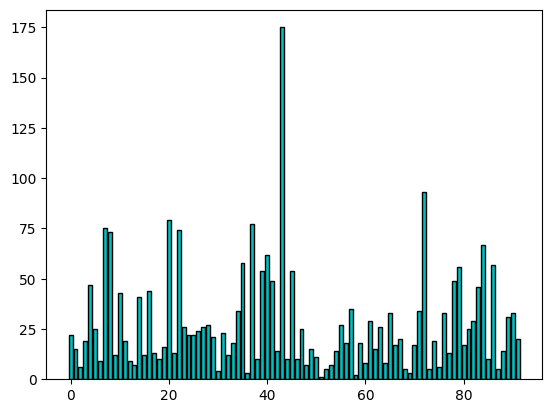

In [69]:
hist_chart = plt.figure()
hist_chart = plt.bar(sd['id'], sd['employee_id'], color = 'c', edgecolor = 'black')

In [70]:
### Сколько курсов прошёл каждый работник
course_employee_sms_df['Sum'] = course_employee_sms_df.loc[:,'course_0':'course_91'].sum(axis=1)
print(course_employee_sms_df.iloc[:,[0,93]].head())
# Среднее число пройденных курсов
mean = course_employee_sms_df.iloc[:,[93]].mean(axis=0)
mean

                            employee_id  Sum
0  2a38a4a9-316c-49e5-a833-517c45d31070   23
1  4e0928de-0755-38c5-93fb-dabb0c5ef2c3   34
2  1ff1de77-4005-f8da-13f4-2943881c655f   27
3  cd3afef9-b8b8-9558-cd56-638c3631868a   28
4  dc513ea4-fbda-a7a1-4786-ffdebc4ef64e   31


Sum    27.572869
dtype: float64

In [71]:
### Число сотрудников, прошедших определённый курс
num_passes = courses_passing_df.loc[:,['course_id','employee_id']]
num_passes['employee_id']=1
num_passes = num_passes.groupby('course_id').sum()

num_passes = num_passes.rename(columns={'employee_id':'number_of_passes'})
num_passes['course_id']=range(0,92)
num_passes

,number_of_passes,course_id
course_id,,
0,52,0
1,226,1
2,36,2
3,45,3
4,101,4
...,...,...
87,39,87
88,171,88
89,208,89


Text(0, 0.5, 'Число прошедших')

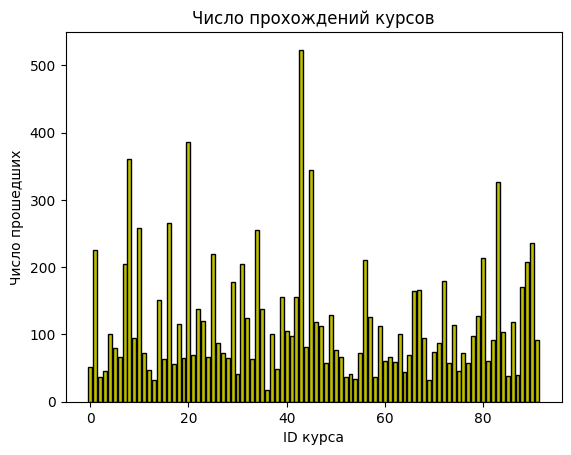

In [72]:
hist_chart = plt.figure()
hist_chart = plt.bar(num_passes['course_id'], num_passes['number_of_passes'], color = 'y', edgecolor = 'black')

plt.title('Число прохождений курсов')
plt.xlabel('ID курса')
plt.ylabel('Число прошедших')

In [73]:
max_p = num_passes['number_of_passes'].max()
min_p = num_passes['number_of_passes'].min()
mask = (num_passes['number_of_passes'] == max_p) | (num_passes['number_of_passes'] == min_p)
num_passes[mask]

,number_of_passes,course_id
course_id,,
36,18,36
43,523,43


In [74]:
# Наименее популярный курс
result['36']

['Разработка стратегии обслуживания для разных сегментов рынка']

In [75]:
# Наиболее популярный курс
result['43']

['Управление ожиданиями и эмоциями клиентов в условиях кризиса']

In [76]:
## Средний процент прохождения курса и среднее затрачиваемое время
courses_passing_df_main_feat = courses_passing_df.loc[:,['course_id','pass_frac','educ_duration_days']]
courses_passing_df_main_feat = courses_passing_df_main_feat.groupby('course_id').sum()

courses_passing_df_main_feat = courses_passing_df_main_feat[['pass_frac','educ_duration_days']].div(num_passes.number_of_passes,axis=0)
courses_passing_df_main_feat

,pass_frac,educ_duration_days
course_id,,
0,0.808654,5.442308
1,0.961726,9.455752
2,0.900000,7.888889
3,0.777778,5.266667
4,0.791584,5.346535
...,...,...
87,0.930769,9.256410
88,0.960234,9.228070
89,0.927885,8.677885


In [77]:
courses_passing_df_main_feat['educ_duration_days'].describe()

count    92.000000
mean      7.584128
std       1.574165
min       2.455446
25%       6.438866
50%       8.025581
75%       8.710182
max       9.905263
Name: educ_duration_days, dtype: float64

In [78]:
m = courses_passing_df_main_feat['pass_frac'].min()
courses_passing_df_main_feat.loc[courses_passing_df_main_feat['pass_frac']==m]

,pass_frac,educ_duration_days
course_id,,
37,0.614851,2.455446


In [79]:
result['37']

['Как преодолевать трудности в общении с трудными клиентами']

## Коммуникация с клиентами

In [80]:
communications_df.head()

,communication_id,communication_dt,employee_id,communication_score,util_flg,communication_period
0,177074281189583840,2023-02-07,269d837a-fada-308d-d4ae-ab28ca2d57e4,85,0,2023-02
1,189925315406757324,2023-07-29,e6384711-4917-13d2-9bc6-3fc5eeb5ba4f,100,0,2023-07
2,321818238739717242,2023-09-06,ab541d87-4c7b-c19a-b776-42849e02b89f,43,1,2023-09
3,192259329962028989,2023-06-19,0a0a0c8a-aa00-ade5-0f74-a3f0ca981ed7,100,1,2023-06
4,705274671052151857,2023-08-11,f93882cb-d8fc-7fb7-94c1-011d63be6fb6,46,0,2023-08


In [81]:
communications_df.isnull().sum()

communication_id        0
communication_dt        0
employee_id             0
communication_score     0
util_flg                0
communication_period    0
dtype: int64

In [82]:
## Расчёт эффективности рабоника
communications_df_copy = communications_df[['employee_id','communication_score','util_flg']]

In [83]:
communications_df_new = communications_df_copy.groupby(['employee_id']).sum()
num_com = communications_df[['employee_id','util_flg']].groupby('employee_id').count()
communications_df_new = communications_df_new[['communication_score','util_flg']].div(num_com.util_flg,axis=0).round(6)

In [84]:
# Оценка эффективности коммуникации
communications_df_new['util_flg']

employee_id
0004d0b5-9e19-461f-f126-e3a08a814c33    0.746972
00411460-f7c9-2d21-24a6-7ea0f4cb5f85    0.766525
006f52e9-102a-8d3b-e2fe-5614f42ba989    0.763355
0070d23b-06b1-486a-538c-0eaa45dd167a    0.758395
008bd5ad-93b7-54d5-0033-8c253d9c1770    0.752252
                                          ...   
fface838-5abb-f94b-4593-a0ed53a0c70f    0.768909
ffd52f3c-7e12-435a-724a-8f30fddadd9c    0.757890
ffeabd22-3de0-d4ea-cb9a-3e6e53e5448d    0.712722
ffedf5be-3a86-e2ee-281d-54cdc97bc1cf    0.761529
ffeed84c-7cb1-ae7b-f4ec-4bd78275bb98    0.768347
Name: util_flg, Length: 2381, dtype: float64

In [85]:
com_min=communications_df_new['communication_score'].min()
com_min

54.538032

In [86]:
# ID сотрудника по его эффективности 
dict_tmp=communications_df_new['communication_score'].to_dict()
key_list = list(dict_tmp.keys())
val_list = list(dict_tmp.values())

position = val_list.index(com_min)
print(key_list[position])

a8f15eda-80c5-0adb-0e71-943adc8015cf


In [87]:
# ID сотрудника по его эффективности 
idx = 0.746972
dict_tmp_2=communications_df_new['util_flg'].to_dict()
key_list_2 = list(dict_tmp_2.keys())
val_list_2 = list(dict_tmp_2.values())

position = val_list_2.index(idx)
print(key_list_2[position])

0004d0b5-9e19-461f-f126-e3a08a814c33


________________________________________________________________

## Поиск значимых параметров

### Матрица с атрибутами сотрудников и целевой переменной (оценка коммуникации и использование продукта)

In [88]:
employees_features= employees_df[['employee_id','age','sex','region','head_employee_id','exp_days','edu_degree','department_id']].copy()
employees_features['comunication_rating'] = employees_features['employee_id'].copy()
employees_features['util_flg']=employees_features['employee_id'].copy()

In [89]:
#comunication_rating
for i in range(2381):
    for j in range(2381):
        if employees_features.iloc[i,0] == key_list[j]:
            employees_features.iloc[i,8] = val_list[j]

In [90]:
#util_flg
for i in range(2381):
    for j in range(2381):
        if employees_features.iloc[i,0] == key_list_2[j]:
            employees_features.iloc[i,9] = val_list_2[j]

Удобная таблица для анализа

In [91]:
employees_features

,employee_id,age,sex,region,head_employee_id,exp_days,edu_degree,department_id,comunication_rating,util_flg
0,0f840be9-b8db-4d3f-bd5b-a2ce59211f55,36,M,4,c81e728d-9d4c-2f63-6f06-7f89cc14862c,734,0,2,57.57355,0.751276
1,ac1dd209-cbcc-5e5d-1c6e-28598e8cbbe8,32,M,4,93db85ed-909c-1383-8ff9-5ccfa94cebd9,654,0,2,62.572921,0.767118
2,a8c88a00-55f6-36e4-a163-a5e3d16adab7,34,F,5,9a115815-4dfa-42ca-ddbd-0694a4e9bdc8,276,1,2,56.352279,0.766001
3,c91591a8-d461-c286-9b9f-535ded3e213e,33,F,4,9f61408e-3afb-633e-50cd-f1b20de6f466,50,2,0,55.833506,0.712656
4,bc731692-9fe1-545b-f0b9-8d114ee3ecb8,33,M,0,a97da629-b098-b75c-294d-ffdc3e463904,274,1,2,58.35234,0.746383
...,...,...,...,...,...,...,...,...,...,...
2376,d707329b-ece4-55a4-62b5-8ce00d1194c9,26,M,4,d67d8ab4-f4c1-0bf2-2aa3-53e27879133c,177,0,2,58.846801,0.761326
2377,d3d94468-02a4-4259-755d-38e6d163e820,26,M,0,202cb962-ac59-075b-964b-07152d234b70,108,2,1,57.940265,0.75354
2378,a64c94ba-af36-8e18-40a1-324e839230de,35,F,0,67c6a1e7-ce56-d3d6-fa74-8ab6d9af3fd7,1018,2,2,62.047064,0.755181
2379,82cec960-96d4-281b-7c95-cd7e74623496,30,F,4,7647966b-7343-c290-4867-3252e490f736,372,0,2,56.1582,0.767779


### Поиск закономерностей в данных

In [ ]:
#sns.pairplot(employees_features)

<Axes: xlabel='None-None', ylabel='sex'>

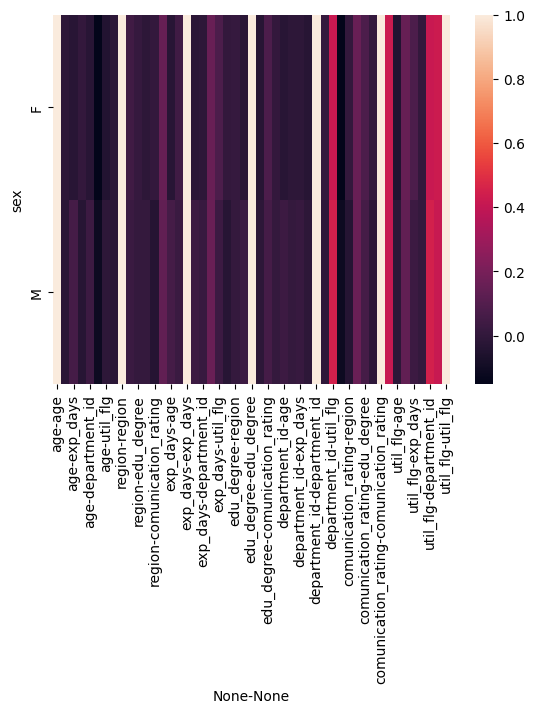

In [92]:
# Влияет ли гендер на эффективность коммуникации
sns.heatmap(employees_features.iloc[:,[1,2,3,5,6,7,8,9]].groupby('sex').corr().unstack())

Из карты видно, что значительного вляния гендера на корреляции не наблюдается, этот параметр можно исключить из дальнейшего анализа

### Теловая карта корреляции параметров и целевой переменной

<Axes: >

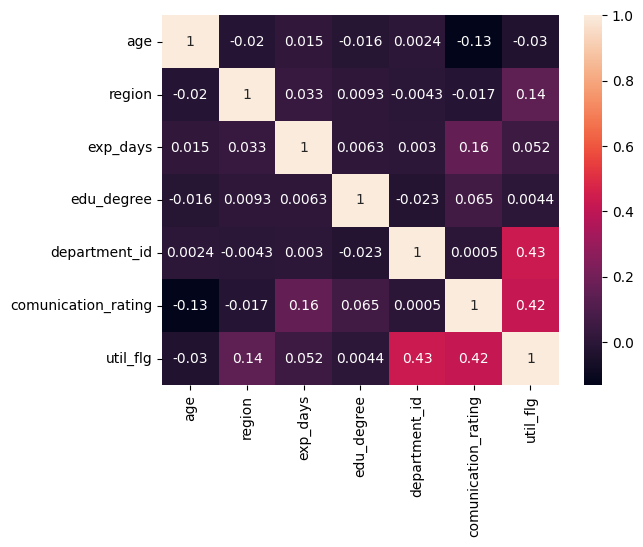

In [93]:
sns.heatmap(employees_features.iloc[:,[1,3,5,6,7,8,9]].corr(),annot=True)

### Влияние главы подразделения на оценку коммуникации и использование продукта

<Axes: ylabel='head_employee_id'>

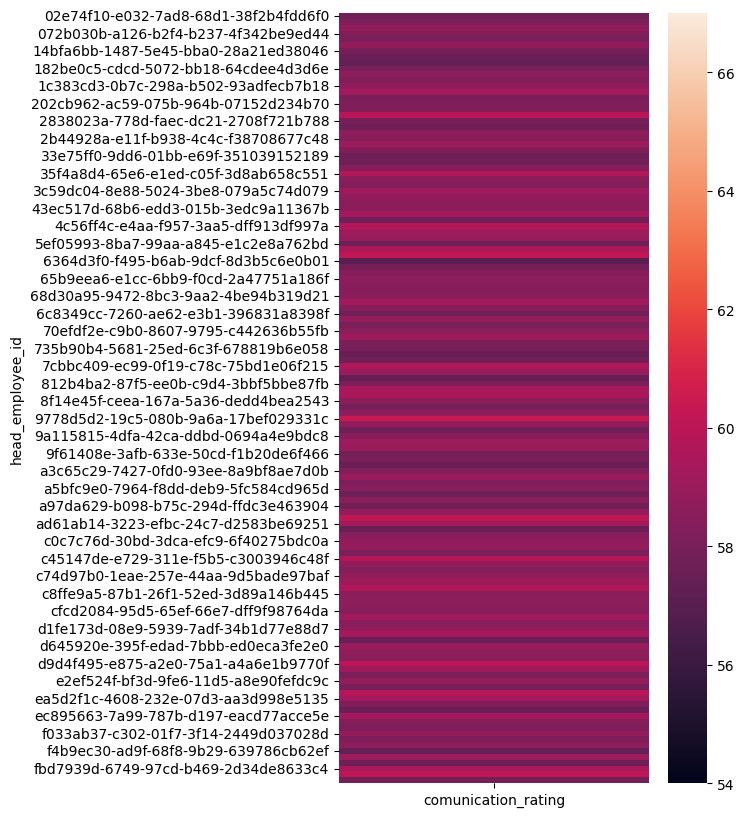

In [96]:
plt.figure(figsize=(5,10))
sns.heatmap(employees_features.iloc[:,[4,8]].groupby('head_employee_id').mean().astype(float),vmin=54,vmax=67)

<Axes: ylabel='head_employee_id'>

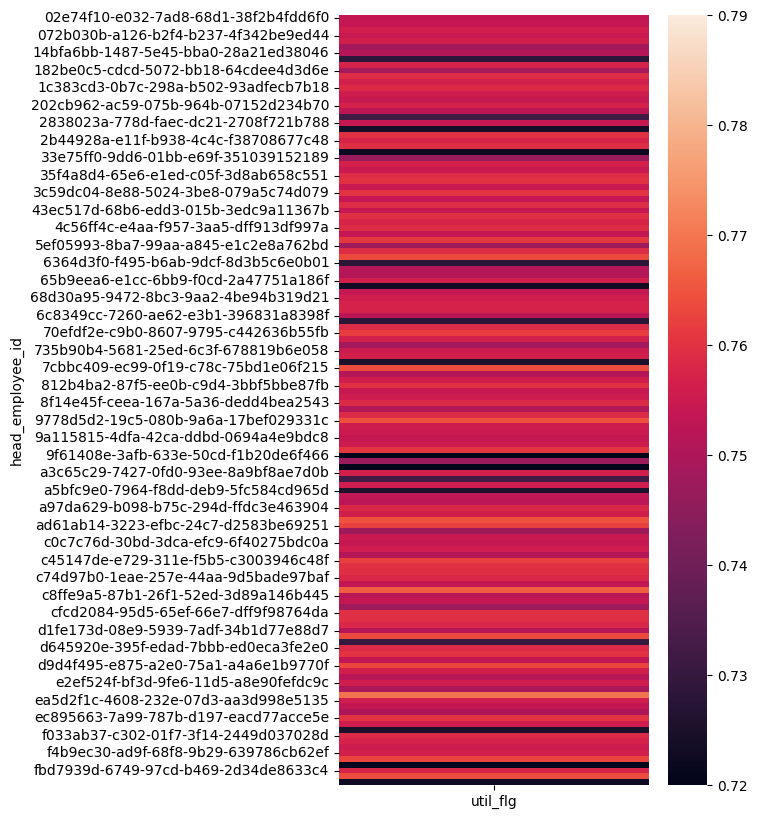

In [97]:
plt.figure(figsize=(5,10))
sns.heatmap(employees_features.iloc[:,[4,9]].groupby('head_employee_id').mean().astype(float),vmin=0.72,vmax=0.79)

Влияние главы подразделения присутствует при оценки обоих параметров

### Влияние номера департамента на качество коммуникации и использование продукта

<Axes: ylabel='department_id'>

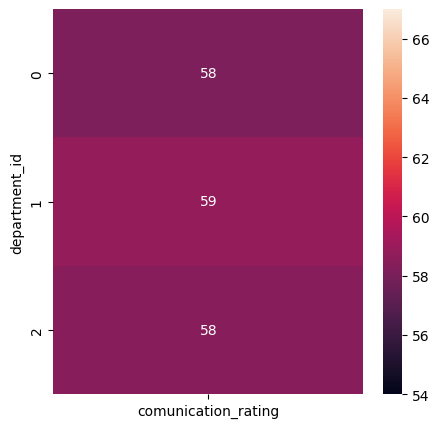

In [98]:
plt.figure(figsize=(5,5))
sns.heatmap(employees_features.iloc[:,[7,8]].groupby('department_id').mean().astype(float),vmin=54.0,vmax=67.0,annot=True)
#sns.heatmap(employees_features.iloc[:,[1,3,4,5,6,7,8]].groupby('department_id').corr().unstack())

<Axes: ylabel='department_id'>

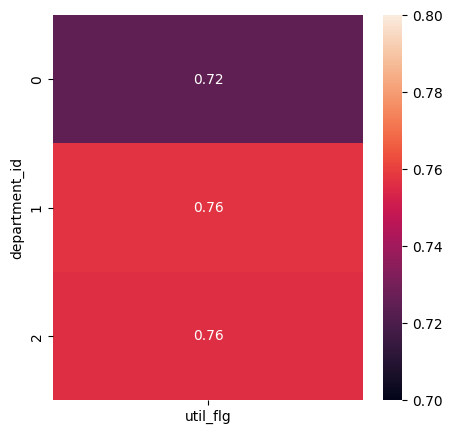

In [99]:
plt.figure(figsize=(5,5))
sns.heatmap(employees_features.iloc[:,[7,9]].groupby('department_id').mean().astype(float),vmin=0.7,vmax=0.8,annot=True)

Процент использования продукта от общего числа коммуникаций в зависимости от номера департамента

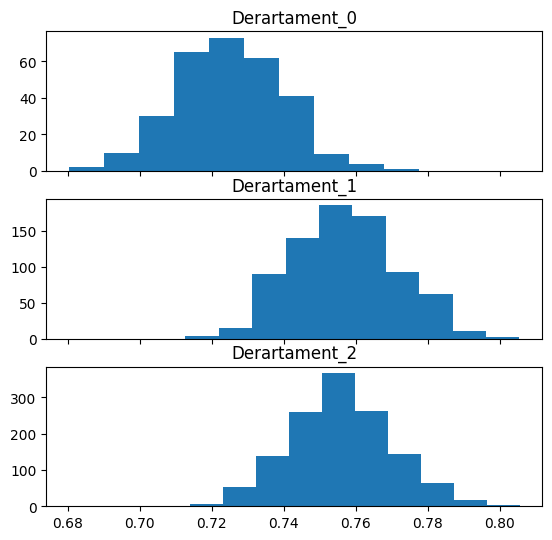

In [100]:
sd=employees_features.groupby(['department_id'])['util_flg'].count()

fig, axs = plt.subplots(nrows= 3 , ncols= 1,sharex=True)

axs[0].hist(employees_features[employees_features['department_id']==0]['util_flg'])
axs[0].set_title("Derartament_0") 
axs[1].hist(employees_features[employees_features['department_id']==1]['util_flg'])
axs[1].set_title("Derartament_1") 
axs[2].hist(employees_features[employees_features['department_id']==2]['util_flg'])
axs[2].set_title("Derartament_2")

plt.subplots_adjust(bottom=0.01,top=1)

Номер департамента явно влияет на использование продукта

### Влияние возраста на на качество коммуникации и использование продукта

<Axes: ylabel='age'>

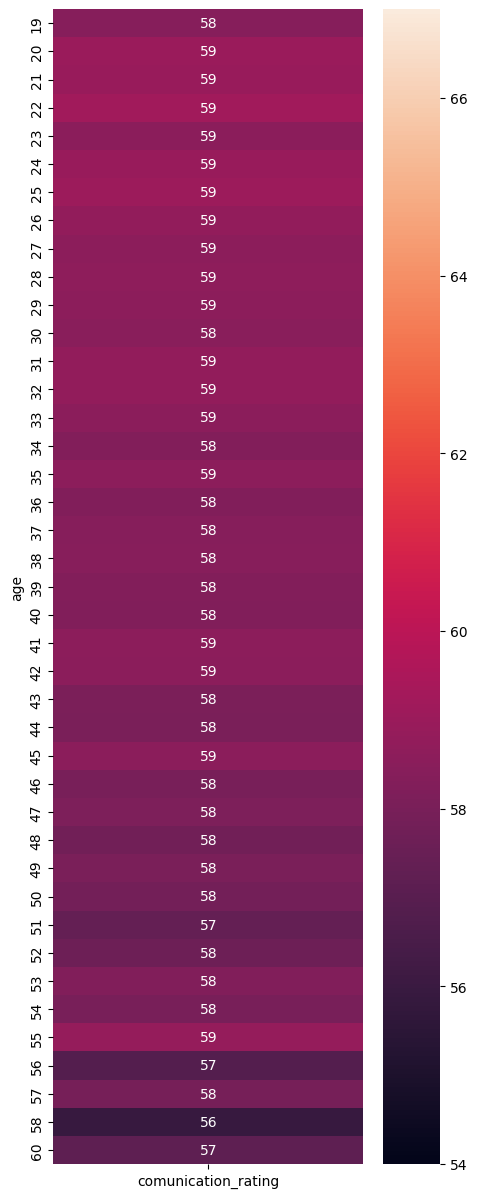

In [101]:
plt.figure(figsize=(5,15))
sns.heatmap(employees_features.iloc[:,[1,8]].groupby('age').mean().astype(float),vmin=54,vmax=67,annot=True)

<Axes: ylabel='age'>

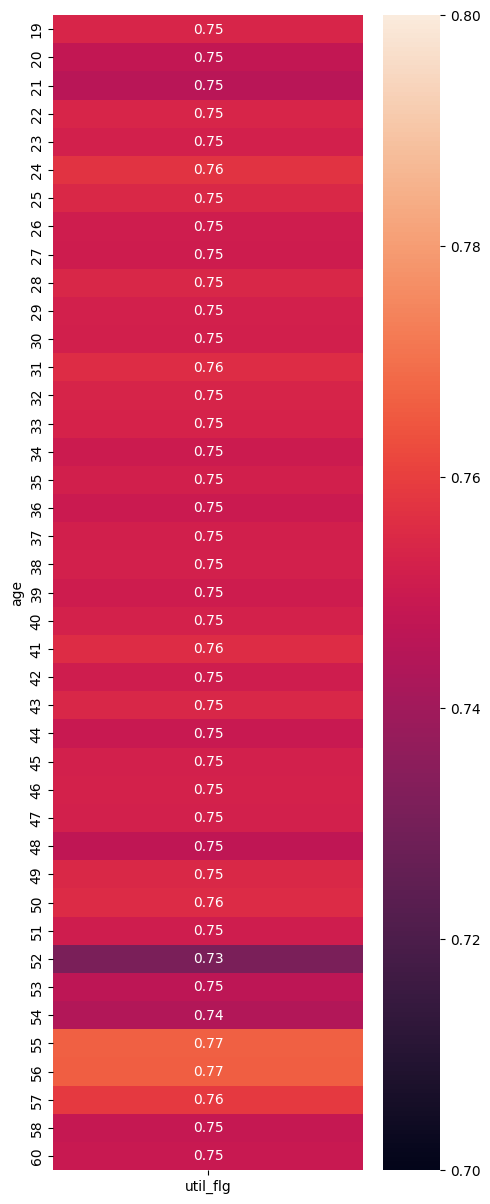

In [102]:
plt.figure(figsize=(5,15))
sns.heatmap(employees_features.iloc[:,[1,9]].groupby('age').mean().astype(float),vmin=0.7,vmax=0.8,annot=True)

### Исследование связи департамента и возраста

Средний возраст сотрудника в каждом департаменте

<Axes: ylabel='department_id'>

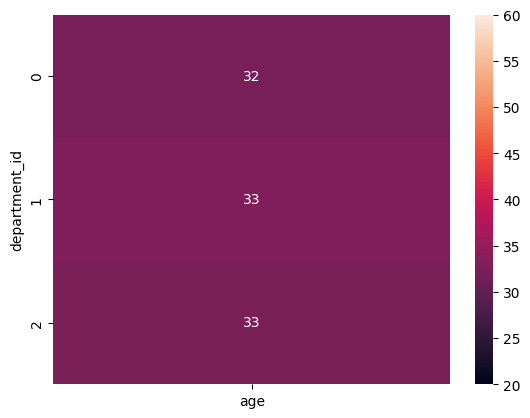

In [103]:
sns.heatmap(employees_features.iloc[:,[1,7]].groupby('department_id').mean().astype(float),annot=True,vmin=20,vmax=60)

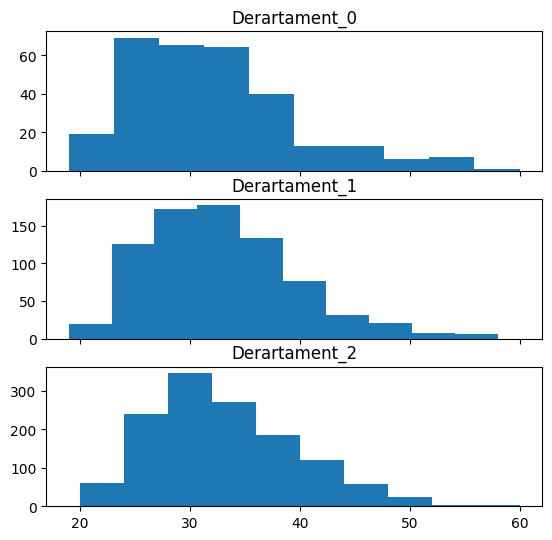

In [104]:
sd=employees_features.groupby(['department_id'])['age'].count()

fig, axs = plt.subplots(nrows= 3 , ncols= 1,sharex=True)

axs[0].hist(employees_features[employees_features['department_id']==0]['age'])
axs[0].set_title("Derartament_0") 
axs[1].hist(employees_features[employees_features['department_id']==1]['age'])
axs[1].set_title("Derartament_1") 
axs[2].hist(employees_features[employees_features['department_id']==2]['age'])
axs[2].set_title("Derartament_2")

plt.subplots_adjust(bottom=0.01,top=1)

Распределение по возрастам в каждом департаменте примерно одинаково.
Таким образом, возраст и номер департамента рассматриваются как независимые атрибуты

### Влияние региона департамента на качество коммуникации и использование продукта

<Axes: ylabel='region'>

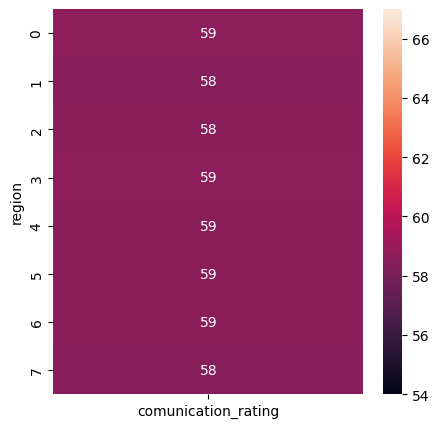

In [105]:
plt.figure(figsize=(5,5))
sns.heatmap(employees_features.iloc[:,[3,8]].groupby('region').mean().astype(float),vmin=54,vmax=67,annot=True)

<Axes: ylabel='region'>

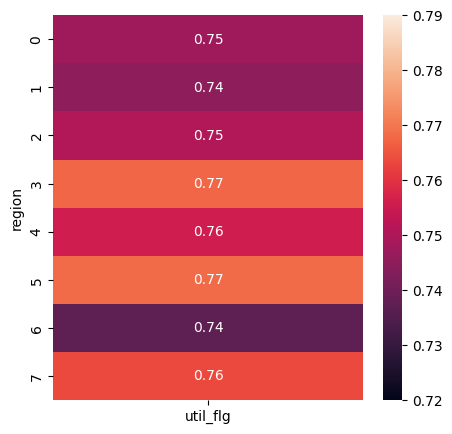

In [106]:
plt.figure(figsize=(5,5))
sns.heatmap(employees_features.iloc[:,[3,9]].groupby('region').mean().astype(float),vmin=0.72,vmax=0.79,annot=True)

Регион явно влияет на использование продукта

### Влияние региона департамента на качество коммуникации и использование продукта

<Axes: ylabel='edu_degree'>

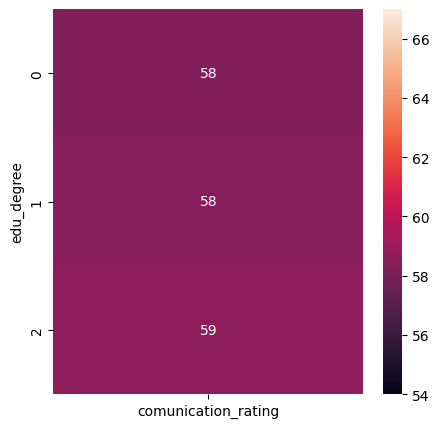

In [107]:
plt.figure(figsize=(5,5))
sns.heatmap(employees_features.iloc[:,[6,8]].groupby('edu_degree').mean().astype(float),vmin=54,vmax=67,annot=True)

<Axes: ylabel='edu_degree'>

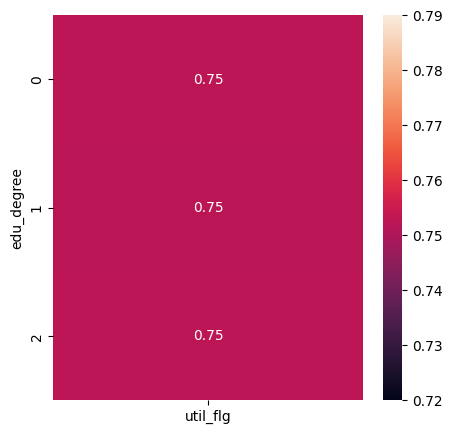

In [108]:
plt.figure(figsize=(5,5))
sns.heatmap(employees_features.iloc[:,[6,9]].groupby('edu_degree').mean().astype(float),vmin=0.72,vmax=0.79,annot=True)

Данный атрибут не влияет на выбранные переменные

### Влияние опыта работы (в месяцах) на качество коммуникации и использование продукта

In [109]:
employees_features['exp_month']=employees_features['exp_days'].copy()
for i in range(2381):
    employees_features.loc[i,'exp_month']=int(employees_features.loc[i,'exp_month']/30)

<Axes: ylabel='exp_month'>

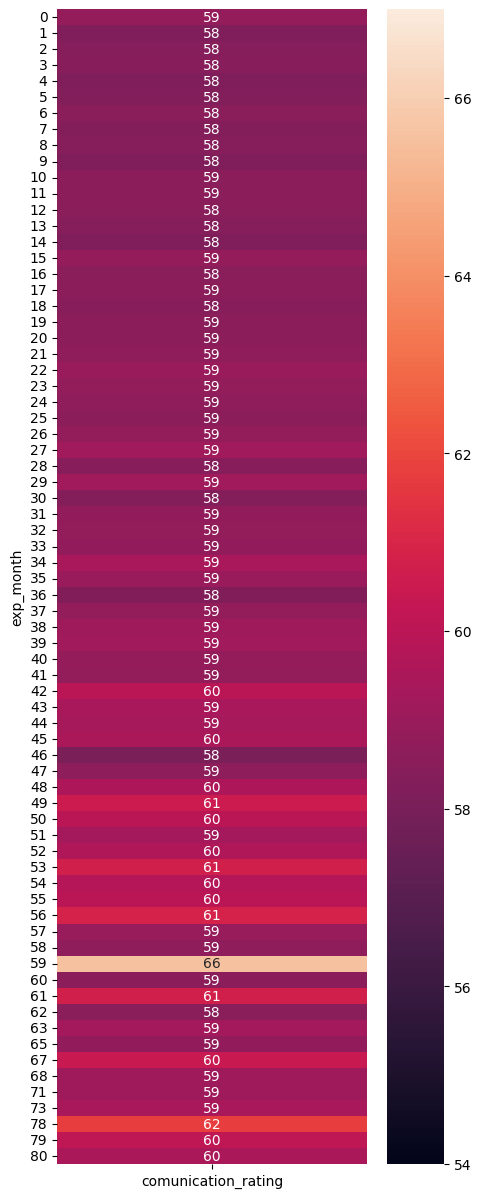

In [110]:
plt.figure(figsize=(5,15))
sns.heatmap(employees_features.iloc[:,[8,10]].groupby('exp_month').mean().astype(float),vmin=54,vmax=67,annot=True)

<Axes: ylabel='exp_month'>

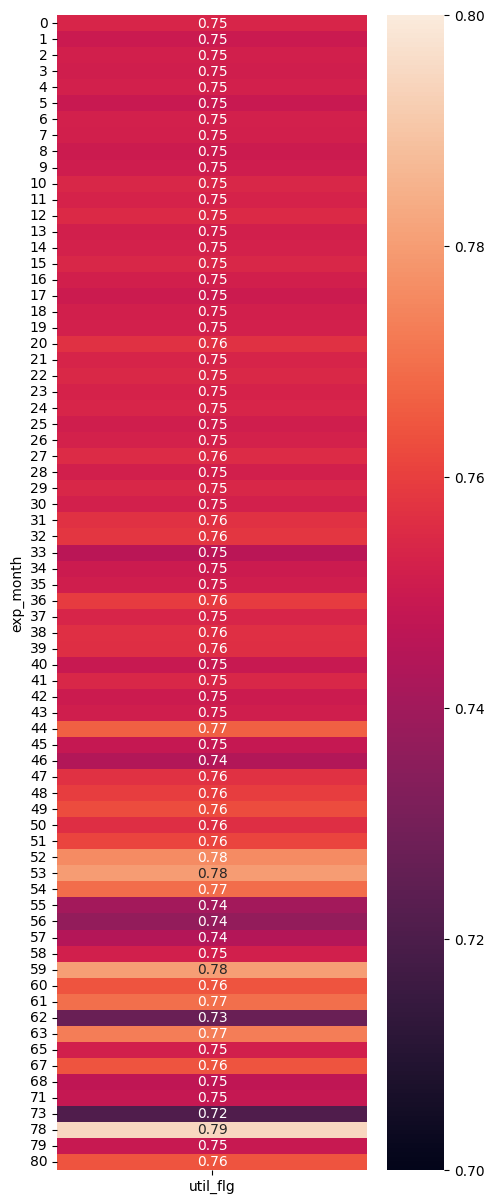

In [111]:
plt.figure(figsize=(5,15))
sns.heatmap(employees_features.iloc[:,[9,10]].groupby('exp_month').mean().astype(float),vmin=0.7,vmax=0.8,annot=True)

## Итог

Атрибуты, оказывающие влияние на качество коммуникации:**'age'**(?), **'head_employee_id'**, **'exp_days'**

Атрибуты, оказывающие влияние на использование продукта:**'head_employee_id'**, **'region'**, **'exp_days'**, **'department_id'**

## Критерий засчитывания курса

In [112]:
courses_passing_df_2 = courses_passing_df.loc[:,['course_id','pass_frac','educ_duration_days']]

Проверка на пропущенные значения NaN

In [113]:
courses_passing_df_2[courses_passing_df_2['pass_frac']!=1.0].isna().sum()

course_id                0
pass_frac                0
educ_duration_days    2437
dtype: int64

In [114]:
courses_passing_df_2[courses_passing_df_2['pass_frac']==1.0].isna().sum()

course_id               0
pass_frac               0
educ_duration_days    109
dtype: int64

Как видно, значения пропущены в столбце educ_duration_days (дни обучения).
В качестве критерия прохождения курса можно использовать процент прохождения курса, известный для всех случаев прохождения

Text(0, 0.5, 'Число сотрудников')

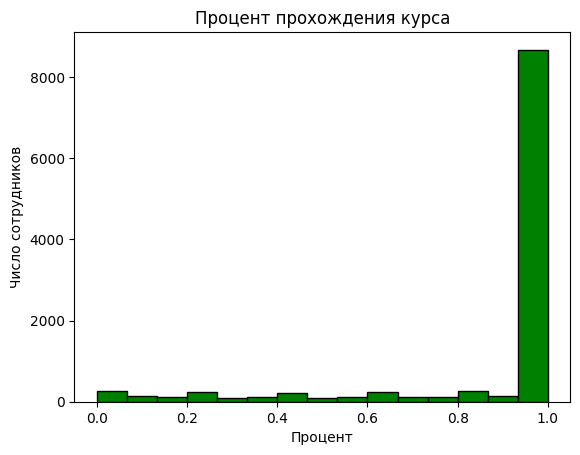

In [41]:
# Порог прохождения
courses_passing_df_2 = courses_passing_df_2.assign(start=1)
sd_2=courses_passing_df_2.groupby(['pass_frac'])['start'].count()

hist_chart = plt.figure()
hist_chart = plt.hist(courses_passing_df_2['pass_frac'], color = 'green', edgecolor = 'black', bins = 15)

plt.title('Процент прохождения курса')
plt.xlabel('Процент')
plt.ylabel('Число сотрудников')

Большая часть сотрудников проходит курс целиком. За критерий прохождения курса возьмём 90% его выполнения

## Выполнение курса по месяцам

In [116]:
courses_start_end_df = courses_passing_df[['course_id','employee_id','pass_frac', 'educ_duration_days','start_dt', 'end_dt']].copy()

In [117]:
courses_start_end_df['start_date'] = pd.to_datetime(courses_start_end_df.start_dt, format='%Y-%m-%d %H:%M:%S')
courses_start_end_df['end_date'] = pd.to_datetime(courses_start_end_df.end_dt, format='%Y-%m-%d %H:%M:%S')

In [118]:
courses_start_end_df = courses_start_end_df.drop(['end_dt'], axis=1)
courses_start_end_df = courses_start_end_df.drop(['start_dt'], axis=1)

Датафрейм с датами начала и окончания прохождения курса

In [119]:
courses_start_end_df

,course_id,employee_id,pass_frac,educ_duration_days,start_date,end_date
0,24,53ed35c7-4a2e-c275-b837-374f04396c03,1.00,6.0,2023-01-30,2023-02-05
1,83,202cb962-ac59-075b-964b-07152d234b70,1.00,12.0,2023-08-29,2023-09-10
2,4,05f971b5-ec19-6b8c-65b7-5d2ef8267331,1.00,11.0,2023-07-29,2023-08-09
3,79,f4a331b7-a22d-1b23-7565-d8813a34d8ac,1.00,10.0,2023-05-30,2023-06-09
4,6,aba3b6fd-5d18-6d28-e06f-f97135cade7f,1.00,10.0,2023-07-12,2023-07-22
...,...,...,...,...,...,...
10945,49,3147da8a-b4a0-437c-15ef-51a5cc7f2dc4,1.00,7.0,2023-05-11,2023-05-18
10946,16,00e26af6-ac3b-1c1c-49d7-c3d79c60d000,1.00,12.0,2023-05-08,2023-05-20
10947,40,e5b294b7-0c96-47dc-f804-d7baa1903918,1.00,14.0,2023-03-30,2023-04-13
10948,24,fb89705a-e6d7-43bf-1e84-8c206e16a1d7,0.05,NaN,2023-05-05,NaT


Как видно из выше представленной таблицы, в столбце даты окончания прохождения курса есть пропущенные значения. Для дизайна АБ тестирования было решено не исключать данные строки, а оценить дату окончания курса на основе среднего времени прохождения

In [46]:
# Cреднее прохождение курса на 100%
ed_days_100_mean = courses_start_end_df[courses_start_end_df['pass_frac']==1]['educ_duration_days'].mean()

In [47]:
# Cреднее прохождение курса на порог = 90%
ed_days_90_mean = round(ed_days_100_mean*0.9,0)
ed_days_90_mean

9.0

In [121]:
# Прохождения курсов с отсутствующей датой окончания
courses_start_end_df[courses_start_end_df['end_date'].isnull()]

,course_id,employee_id,pass_frac,educ_duration_days,start_date,end_date
10,55,00ac8ed3-b432-7bdd-4ebb-ebcb2ba10a00,0.10,NaN,2023-07-04,NaT
13,7,68d30a95-9472-8bc3-9aa2-4be94b319d21,0.55,NaN,2023-06-29,NaT
20,4,9ac403da-7947-a183-884c-18a67d3aa8de,0.75,NaN,2023-10-28,NaT
21,29,1f1baa5b-8eda-c74e-b4ea-a329f14a0361,0.90,NaN,2023-06-07,NaT
22,8,091d584f-ced3-01b4-4265-4dd8c23b3fc9,0.90,NaN,2023-02-22,NaT
...,...,...,...,...,...,...
10936,40,1d72310e-dc00-6dad-f219-0caad5802983,0.65,NaN,2023-09-20,NaT
10937,81,cd3afef9-b8b8-9558-cd56-638c3631868a,0.40,NaN,2023-08-09,NaT
10938,31,d240e3d3-8a88-82ec-ad86-33c8f9c78c9b,0.15,NaN,2023-04-14,NaT
10939,43,1f1baa5b-8eda-c74e-b4ea-a329f14a0361,0.40,NaN,2023-11-01,NaT


In [122]:
# Рассчёт даты окончания курса для NaN
mask = courses_start_end_df[courses_start_end_df['end_date'].isnull()]
mask.loc[:,'end_date'] = mask.loc[:,'start_date']+pd.DateOffset(days=ed_days_90_mean)
mask.loc[:,'educ_duration_days'] = ed_days_90_mean
mask

,course_id,employee_id,pass_frac,educ_duration_days,start_date,end_date
10,55,00ac8ed3-b432-7bdd-4ebb-ebcb2ba10a00,0.10,9.0,2023-07-04,2023-07-13
13,7,68d30a95-9472-8bc3-9aa2-4be94b319d21,0.55,9.0,2023-06-29,2023-07-08
20,4,9ac403da-7947-a183-884c-18a67d3aa8de,0.75,9.0,2023-10-28,2023-11-06
21,29,1f1baa5b-8eda-c74e-b4ea-a329f14a0361,0.90,9.0,2023-06-07,2023-06-16
22,8,091d584f-ced3-01b4-4265-4dd8c23b3fc9,0.90,9.0,2023-02-22,2023-03-03
...,...,...,...,...,...,...
10936,40,1d72310e-dc00-6dad-f219-0caad5802983,0.65,9.0,2023-09-20,2023-09-29
10937,81,cd3afef9-b8b8-9558-cd56-638c3631868a,0.40,9.0,2023-08-09,2023-08-18
10938,31,d240e3d3-8a88-82ec-ad86-33c8f9c78c9b,0.15,9.0,2023-04-14,2023-04-23
10939,43,1f1baa5b-8eda-c74e-b4ea-a329f14a0361,0.40,9.0,2023-11-01,2023-11-10


In [123]:
courses_start_end_df[courses_start_end_df['end_date'].isnull()] = mask

### Итоговый датафрейм без пропущенных значений

In [124]:
courses_start_end_df

,course_id,employee_id,pass_frac,educ_duration_days,start_date,end_date
0,24,53ed35c7-4a2e-c275-b837-374f04396c03,1.00,6.0,2023-01-30,2023-02-05
1,83,202cb962-ac59-075b-964b-07152d234b70,1.00,12.0,2023-08-29,2023-09-10
2,4,05f971b5-ec19-6b8c-65b7-5d2ef8267331,1.00,11.0,2023-07-29,2023-08-09
3,79,f4a331b7-a22d-1b23-7565-d8813a34d8ac,1.00,10.0,2023-05-30,2023-06-09
4,6,aba3b6fd-5d18-6d28-e06f-f97135cade7f,1.00,10.0,2023-07-12,2023-07-22
...,...,...,...,...,...,...
10945,49,3147da8a-b4a0-437c-15ef-51a5cc7f2dc4,1.00,7.0,2023-05-11,2023-05-18
10946,16,00e26af6-ac3b-1c1c-49d7-c3d79c60d000,1.00,12.0,2023-05-08,2023-05-20
10947,40,e5b294b7-0c96-47dc-f804-d7baa1903918,1.00,14.0,2023-03-30,2023-04-13
10948,24,fb89705a-e6d7-43bf-1e84-8c206e16a1d7,0.05,9.0,2023-05-05,2023-05-14


In [53]:
courses_start_end_df.isnull().sum()

course_id             0
employee_id           0
pass_frac             0
educ_duration_days    0
start_date            0
end_date              0
dtype: int64

## Изменение качества коммуникации (по месяцам)

In [54]:
communications_df['communication_dt'] = pd.to_datetime(communications_df['communication_dt'] )
communications_df['communication_period'] = communications_df["communication_dt"].dt.to_period("M")
communications_eff = communications_df.groupby(['employee_id','communication_period'])["communication_score"].mean()
num_of_periods = int(communications_eff.count()/num_employees)
communications_eff_arr = communications_eff.to_numpy().reshape(num_employees,num_of_periods)
communications_eff_timeseries = pd.DataFrame(communications_eff_arr,columns=range(0,num_of_periods))
communications_eff_timeseries["user_id"] = communications_eff.index.get_level_values(0)[0:communications_eff.count():num_of_periods]
communications_eff_timeseries.set_index('user_id',inplace = True)

Датафрейм с изменением эффективности коммуникации для кажого сотрудника во времени (по месяцам)

In [55]:
communications_eff_timeseries.head()

,0,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,,
0004d0b5-9e19-461f-f126-e3a08a814c33,60.434783,56.605505,56.407895,57.142322,60.670455,57.660156,56.765766,55.636029,56.475524,55.944134,52.895522,60.588235
00411460-f7c9-2d21-24a6-7ea0f4cb5f85,50.537313,49.901099,59.029197,55.551913,53.781095,55.476852,60.317568,60.018868,62.126087,58.030303,58.386792,50.203704
006f52e9-102a-8d3b-e2fe-5614f42ba989,59.925373,55.695652,58.630303,58.946429,55.750000,58.411290,64.481707,64.857143,66.167969,61.592760,63.824818,62.887640
0070d23b-06b1-486a-538c-0eaa45dd167a,60.752577,59.914062,56.558140,57.476562,56.566176,58.174074,60.829268,62.119048,57.041667,56.139175,58.986667,64.172043
008bd5ad-93b7-54d5-0033-8c253d9c1770,56.703297,60.259740,58.645161,56.173077,59.293839,56.482014,59.566038,53.783410,56.862745,56.201005,54.060403,50.333333


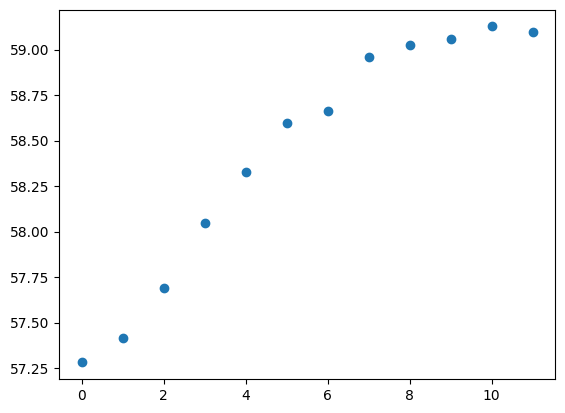

In [56]:
communications_eff_timeseries_arr = communications_eff_timeseries.mean(axis=0).to_numpy()
months = np.arange(12)
plt.plot(months, communications_eff_timeseries_arr, 'o')
plt.show()

Видно, что в среднем эффективность коммуникации у работников растет и выходит на "плато". Это может быть связано как с прохождением обучающих курсов, так и с увеличением опыта работы.